Paquetes necesarios

In [2]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt

Inicializaciones

In [5]:
#Dimensiones de la imagen a crear
ancho = 200
alto = 300

Muestra imagen con imshow (OpenCV) en ventana independiente

Imagen en grises

In [6]:
#Crea una imagen de un único plano, que se interpreta como nivel de gris (0 negro, 255 blanco)
gris_img = np.zeros((ancho,alto,1), dtype = np.uint8)
#Muestra dimensiones de la imagen creada
print(gris_img.shape)

(200, 300, 1)


In [7]:
#Muestra la imagen (negra al inicializarse a 0) con las utilidades de OpenCV en una ventana independiente
cv2.imshow('Imagen', gris_img)
cv2.imshow('Imagen2', gris_img)

cv2.waitKey(-1) # Se detiene hasta pulsar tecla (>0 milisegundos)
cv2.destroyAllWindows() # Destruye todas las ventanas

Muestra imagen con matplotlib

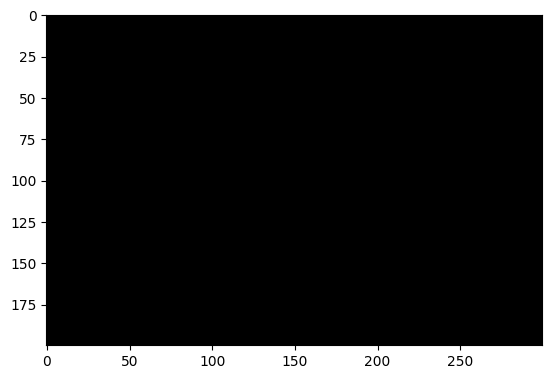

In [16]:
#Muestra la imagen con matplotlib, aparece integrada en el cuaderno
#Es necesario especificar que el mapa de color usado es de grises
#plt.imshow(gris_img, cmap='gray')
#plt.imshow(gris_img)
#plt.show()

#replicar una imagen de gris creando una imagen gris pero con tres planos (RGB)
img2 = cv2.merge((gris_img,gris_img,gris_img))
plt.imshow(img2)
plt.show()

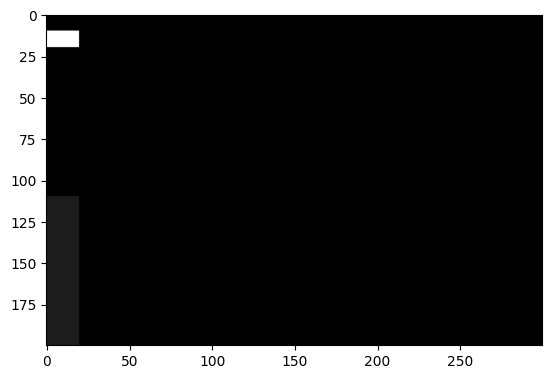

In [17]:
#Modifica un par de zonas rectangulares de la imagen
gris_img[:] = 0
gris_img[10:20,0:20,0] = 255 #Especifica el canal 0
gris_img[110:220,0:20,0] = 28 #
#gris_img[50:70,40:60] = 255 #realmente no es necesario con un único plano

#Muestra la imagen con matplotlib
#Es necesario especificar que el mapa de color usado es de grises
plt.imshow(gris_img, cmap='gray')
plt.show()

Imagen con tono de gris aleatorio

(200, 300, 1)


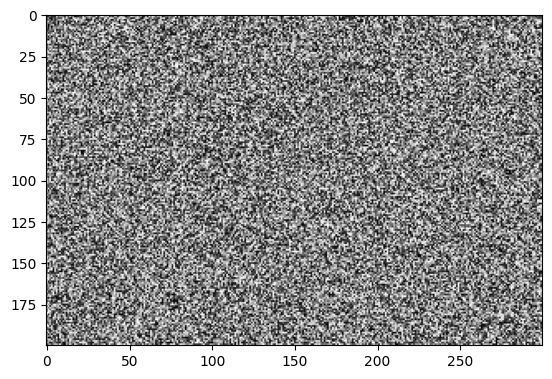

In [18]:
#Crea imagen con un único plano (gris)
gris_img = np.random.randint(255, size=(ancho,alto, 1))
#Muestra dimensiones
print(gris_img.shape)
#Visualiza
plt.imshow(gris_img, cmap='gray') #Visualiza con mapa de color gris
plt.show()

Asignamos valor a los píxeles de una zona concreta

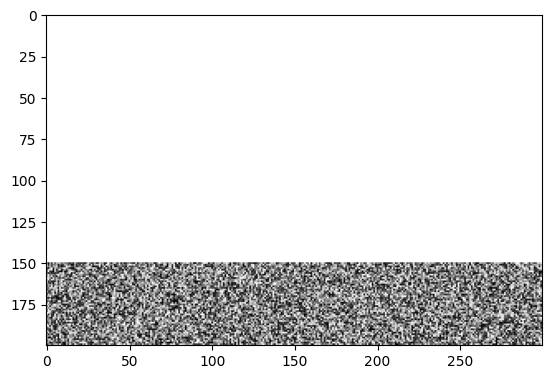

In [19]:
#Modifica la primera mitad de la imagen, asignando 255, es decir blanco
gris_img[0:int(alto/2),:,:] = 255
#Visualiza con mapa de color gris
plt.imshow(gris_img, cmap='gray') #Te animo a probar a eliminar la especificación del mapa de color
plt.show()

TAREA: Crea una imagen, p.e. 800x800, con la textura del tablero de ajedrez

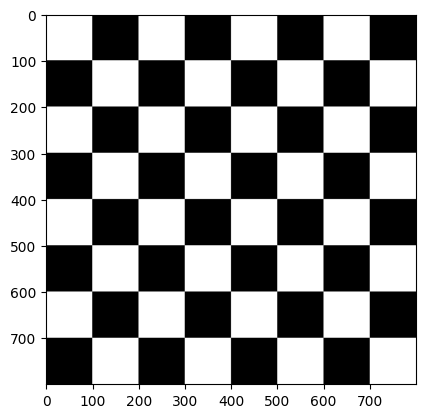

In [20]:

class Chessboard:
    """
        Chessboard:

        Creates a chessboard table.
        It can be converted to image using numpy.
    """
    def __init__(self, n_rows = 8):
        self.size = n_rows * 100
        self.n_rows = n_rows
        self._square_size=self.size//n_rows

    def paint_quare(self, image, point, width, color):
        image[point[1]:point[1] + width,point[0]:point[0]+width] = color
    
    def to_img(self):
        img = np.zeros((self.size, self.size,1), dtype = np.uint8)
        paint_phase = 0
        
        for x in range(0, self.size, (self.size//self.n_rows)):
            for y in range(paint_phase, self.size, (self.size//self.n_rows) * 2):
                self.paint_quare(img, (x, y), self._square_size, 255)
            paint_phase = self.size//self.n_rows if paint_phase == 0 else 0
        return img
    

chessboard = Chessboard(n_rows=8)
image = chessboard.to_img()

plt.imshow(image, cmap='gray')
plt.show()



Imagen en color

(200, 200, 3)


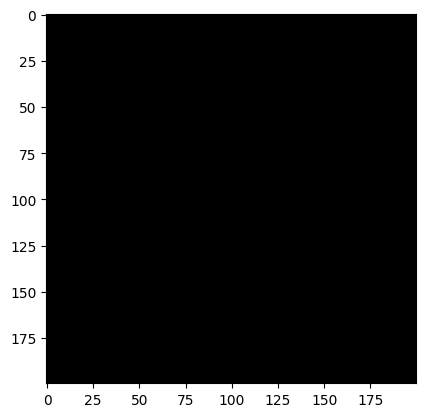

In [21]:
#Crea una imagen con tres planos
color_img = np.zeros((200,200,3), dtype = np.uint8)
#Dimensiones
print(color_img.shape)
#Visualiza sin especificar el mapa de color gris
plt.imshow(color_img) 
plt.show()


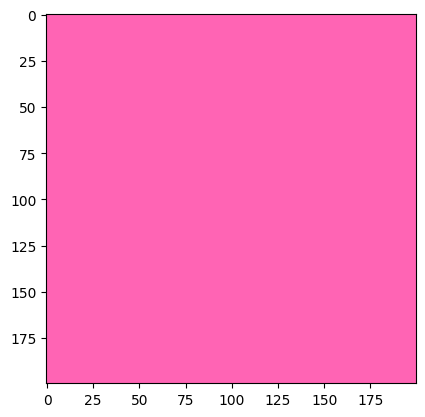

In [22]:
#Modifica el primer plano de color (Rojo, ya que es RGB)
color_img[:,:,0] = 255 
color_img[:,:,1] = 100 #Prueba otras combinaciones
color_img[:,:,2] = 180
plt.imshow(color_img) 
plt.show()

TAREA: Crear una imagen estilo Mondrian (un ejemplo https://www3.gobiernodecanarias.org/medusa/ecoescuela/sa/2017/04/17/descubriendo-a-mondrian/ )

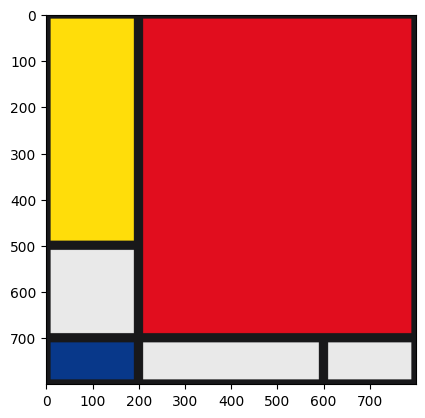

In [23]:
class Rectangle:
    def __init__(self, width, height, rgb, offset = 0):
        self.width = width
        self.height = height
        self.rgb = rgb
        self.offset = offset

    def apply(self, image, point):
        image[point[1]+self.offset:point[1] + self.height-self.offset , point[0]+self.offset:point[0]+self.width-self.offset] = self.rgb

    
color_img = np.zeros((800, 800,3), dtype = np.uint8)
background = Rectangle(800, 800, (24, 24, 26))
background.apply(color_img, (0, 0))

rectangles = [  
    Rectangle(200, 500, (255, 221, 10), offset=10),
    Rectangle(200, 200, (233, 233, 233), offset=10),
    Rectangle(200, 100, (8, 56, 138), offset=10),
    Rectangle(600, 700, (225, 13, 30), offset=10),
    Rectangle(400, 100, (233, 233, 233), offset=10),
    Rectangle(200, 100, (233, 233, 233), offset=10)
]

positions = [(0, 0), (0, 500), (0, 700), (200, 0), (200, 700), (600, 700)]

for x in range(0, len(positions)):
    rectangles[x].apply(color_img, positions[x])

plt.imshow(color_img)
plt.show()


Funciones de dibujo.
OpenCV dispone de distintas funciones específicas para dibujar formas básicas (más información https://docs.opencv.org/4.x/dc/da5/tutorial_py_drawing_functions.html )

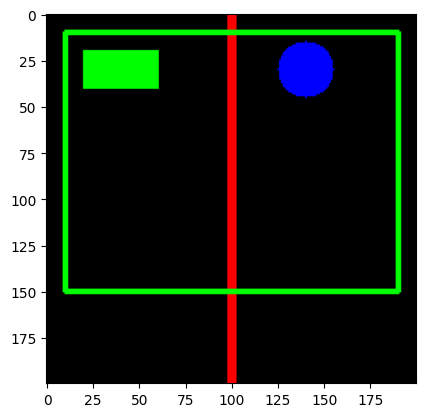

True

In [25]:
#Crea una imagen con tres planos
color_img = np.zeros((200,200,3), dtype = np.uint8)

#Línea roja vertical de grosor 3
cv2.line(color_img,(int(ancho/2),0),(int(ancho/2),alto),(255,0,0),3)
#Rectángulo con grosor 2
cv2.rectangle(color_img,(10,10),(ancho-10,int(alto/2)),(0,255,0),2)
#Rectángulo relleno
cv2.rectangle(color_img,(20,20),(60,40),(0,255,0),-1)
#Círculo de radio 15 relleno
cv2.circle(color_img,(ancho-60,30), 15, (0,0,255), -1)
#Visualiza sin especificar el mapa de color gris
plt.imshow(color_img) 
plt.show()


#Salva la imagen resultante a disco
cv2.imwrite('imagen.jpg', color_img)

TAREA: Resuelve una de las tareas previas (a elegir) con las funciones de dibujo de OpenCV  :)

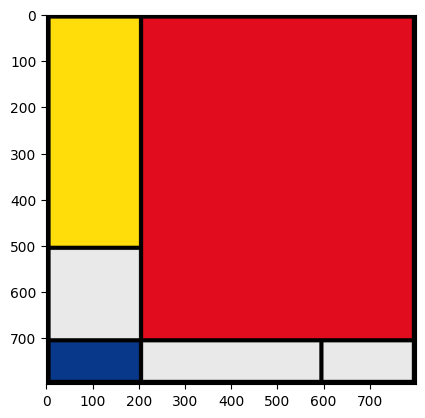

In [11]:
#Using opencv
color_img = np.zeros((800, 800,3), dtype = np.uint8)

cv2.rectangle(color_img, (10, 10), (200, 500), (255, 221, 10), -1)
cv2.rectangle(color_img, (10, 510), (200, 700), (233, 233, 233), -1)
cv2.rectangle(color_img, (10, 710), (200, 790), (8, 56, 138), -1)

cv2.rectangle(color_img, (210, 10), (790, 700), (225, 13, 30), -1)
cv2.rectangle(color_img, (210, 710), (590, 790), (233, 233, 233), -1)
cv2.rectangle(color_img, (600, 710), (790, 790), (233, 233, 233), -1)

plt.imshow(color_img)
plt.show()

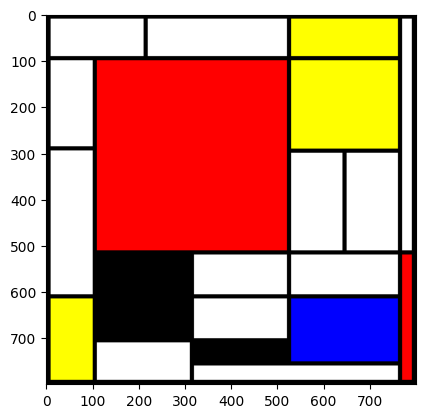

In [26]:
color_img = np.zeros((800, 800, 3), dtype = np.uint8)

cv2.rectangle(color_img, (10, 10), (210, 90), (255, 255, 255), -1)
cv2.rectangle(color_img, (220, 10), (520, 90), (255, 255, 255), -1)
cv2.rectangle(color_img, (530, 10), (760, 90), (255, 255, 0), -1)

cv2.rectangle(color_img, (10, 100), (100, 285), (255, 255, 255), -1)
cv2.rectangle(color_img, (10, 295), (100, 605), (255, 255, 255), -1)
cv2.rectangle(color_img, (10, 615), (100, 790), (255, 255, 0), -1)

cv2.rectangle(color_img, (110, 100), (520, 510), (255, 0, 0), -1)
cv2.rectangle(color_img, (530, 100), (760, 290), (255, 255, 0), -1)
cv2.rectangle(color_img, (530, 300), (640, 510), (255, 255, 255), -1)
cv2.rectangle(color_img, (650, 300), (760, 510), (255, 255, 255), -1)

cv2.rectangle(color_img, (110, 710), (310, 790), (255, 255, 255), -1)
cv2.rectangle(color_img, (320, 520), (520, 605), (255, 255, 255), -1)
cv2.rectangle(color_img, (320, 615), (520, 700), (255, 255, 255), -1)

cv2.rectangle(color_img, (530, 520), (760, 605), (255, 255, 255), -1)
cv2.rectangle(color_img, (530, 615), (760, 750), (0, 0, 255), -1)

cv2.rectangle(color_img, (770, 10), (790, 510), (255, 255, 255), -1)
cv2.rectangle(color_img, (770, 520), (790, 790), (255, 0, 0), -1)
cv2.rectangle(color_img, (320, 760), (760, 790), (255, 255, 255), -1)

plt.imshow(color_img)
plt.show()

Abrir imagen almacenada en disco

In [ ]:
#Carga imagen desde disco
img = cv2.imread('logo_ulpgc_vertical_acronimo_mancheta_azul.png') 
#Dimensiones
print(img.shape)
#Muestra
plt.imshow(img) 
plt.show()

#OpenCV lee las imágenes de disco en formato BGR, por lo que convertimos para visualizr RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb) 
plt.show()

#Fuerza lectura en grises
img = cv2.imread('logo_ulpgc_vertical_acronimo_mancheta_azul.png', cv2.IMREAD_GRAYSCALE) 
plt.imshow(img, cmap='gray') 
plt.show()


Abre un archivo de vídeo

In [ ]:
vid = cv2.VideoCapture('Ayagaures_vibe_result.mp4') #Busca n vídeo propio
  
while(True):      
    # fotograma a fotograma
    ret, frame = vid.read()

    if ret:  
        # Muestra fotograma
        cv2.imshow('Vid', frame)
    
    # Detenemos pulsado ESC
    if cv2.waitKey(1000) == 27:
        break
  
# Libera el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()

Muestra entrada de la cámara

In [ ]:
vid = cv2.VideoCapture(0)
  
while(True):      
    # fotograma a fotograma
    ret, frame = vid.read()
  
    if ret:  
        # Muestra fotograma
        cv2.imshow('Vid', frame)
    
    # Detenemos pulsado ESC
    if cv2.waitKey(20) == 27:
        break
  
# Libera el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()

Separa los tres planos de la imagen captada por la webcam

In [ ]:
vid = cv2.VideoCapture(0)
  
while(True):      
    # fotograma a fotograma
    ret, frame = vid.read()

    if ret:
        #Separamos canales
        b = frame[:,:,0]
        g = frame[:,:,1]
        r = frame[:,:,2]
        #Dimensiones
        h, w, c = frame.shape

        #Concateamos en horizontal los tres planos del fotograma
        collage = np.hstack((r, g, b))
    
        # Muestra fotograma redimensionando a la mitad para que quepa en pantalla
        cv2.imshow('Cam3', cv2.resize(collage, (int(w*1.5),int(h/2)),cv2.INTER_NEAREST), )
    
    # Detenemos pulsado ESC
    if cv2.waitKey(20) == 27:
        cv2.destroyAllWindows()
        break
  
# Libera el objeto de captura
vid.release()
# Destruye ventanas

TAREA: Modifica de alguna forma los valores de un plano de la imagen

In [27]:
vid = cv2.VideoCapture(0)

while True:
    ret, frame = vid.read()

    if not ret:
        break  # Exit the loop if video capture fails

    # Overlay text on the frame
    font = cv2.FONT_HERSHEY_SIMPLEX
    fontScale = 1
    color = (8, 56, 138)
    thickness = 2
    text = "OpenCV"
    
    textsize = cv2.getTextSize(text, font, fontScale=fontScale, thickness=thickness)[0]
    org = ((frame.shape[1] - textsize[0]) // 2, 50)
    image = cv2.putText(frame, text, org, font, fontScale, color, thickness, cv2.LINE_AA)

    # SEPARO LOS CANALES MULTIPLICANDO POR EL ARRAY [1, 0, 0] PARA QUE MANTENGA EL FORMATO BGR
    # LO CONVERTIMOS EN NEGATIVO RESTANDO 1
    r = 1 - (frame[:, :] *  [1, 0, 0])

    #AUMENTO EL BRILLO DE LA IMAGEN MULTIPLICANDO POR UN ESCALAR
    g = (frame[:, :] * [0, 1, 0]) * 2

    #PASA QUE MUCHAS VECES ESA MULTIPLICACION SE SALE POR ENCIMA DE 255 POR LO TANTO LA IMAGEN SE DISTORSIONA
    #A SI QUE NOS ASEGURAMOS QUE EL MINIMO SEA 0 Y EL MAXIMO SEA 255 DE LOS DIFERENTES ELEMENTOS
    g = np.clip(g, 0, 255)

    #VAMOS A OSCURECER LA IMAGEN DIVIDIENDOLA ENTRE UN NUMERO
    # EN ESTE CASO NO HAY PELIGRO DE QUE EL VALOR BAJE DE 0 PUES LA FUNCION F(X) = X/n tiene una asintota horizontal en 0
    b = (frame[:, :] * [0, 0, 1])/2

    final = np.hstack((r, g, b))
    final = final.astype(np.uint8)

    w, h, c = frame.shape

    cv2.imshow("CAMERA", cv2.resize(final, (int(w*3),int(h/3)),cv2.INTER_NEAREST))

    # Stop when the ESC key is pressed
    if cv2.waitKey(20) == 27:
        break

vid.release()
cv2.destroyAllWindows()

KeyboardInterrupt: 

Evento de ratón para mostrar el valor RGB del píxel

In [ ]:
# Función que trata eventos de ratón 
def mouse_events(event, x, y, flags, params):
    global px, py, R, G, B
    px = -1
    # Movimiento del puntero     
    if event==cv2.EVENT_MOUSEMOVE:
        #Valores del píxel
        B = frame[y, x, 0]
        G = frame[y, x, 1]
        R = frame[y, x, 2]  

        px = x
        py = y

In [ ]:
vid = cv2.VideoCapture(0)

# Tipografía para mostrar texto
font = cv2.FONT_HERSHEY_SIMPLEX
  
lanzado = 0
px = -1
while(True):      
    # fotograma a fotograma
    ret, frame = vid.read()

    if ret: 
        # Activa em manejador en el primer fotograma
        if lanzado == 0:
            # Muestra fotograma
            cv2.imshow('Cam', frame)   
            # Define el nombre del manejador del evento
            cv2.setMouseCallback('Cam', mouse_events)
            lanzado = 1
            
        # Muestra valores RGB intentando centrar en el puntero
        if px > -1:
            cv2.putText(frame, '{}'.format(R), (px-45,py-5), font, 0.5, (0, 0, 255), 1)
            cv2.putText(frame, '     {}'.format(G), (px-54,py-5), font, 0.5, (0, 255, 0), 1)
            cv2.putText(frame, '         {}'.format(B), (px-54,py-5), font, 0.5, (255, 0, 0), 1)
            
        cv2.imshow('Cam', frame)   
        
    # Detenemos pulsado ESC
    if cv2.waitKey(20) == 27:
        break
  
# Libera el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()

TAREA:
Pintar círculos en las posiciones del píxel más claro y oscuro de la imagen 
¿Si quisieras hacerlo sobre la zona 8x8 más clara/oscura?

In [28]:
import cv2

#PIXEL MAS CLARO
video = cv2.VideoCapture(0)

import numpy as np

def find_brightest_pixel(image):
    # Initialize variables to keep track of the brightest pixel and its brightness
    brightest_pixel = None
    max_brightness = -1  # Initialize to a low value

    # Iterate through all the pixels in the image
    for y in range(image.shape[0]):
        for x in range(image.shape[1]):
            # Calculate the brightness of the current pixel
            pixel_brightness = np.mean(image[y, x])

            # Check if this pixel is brighter than the previous brightest
            if pixel_brightness > max_brightness:
                max_brightness = pixel_brightness
                brightest_pixel = (x, y)  # Store the coordinates of the brightest pixel

    return brightest_pixel, max_brightness

def find_darkest_pixel(image):
    # Initialize variables to keep track of the darkest pixel and its brightness
    darkest_pixel = None
    min_brightness = 256  # Initialize to a high value (assuming 8-bit grayscale)

    # Iterate through all the pixels in the image
    for y in range(image.shape[0]):
        for x in range(image.shape[1]):
            # Calculate the brightness of the current pixel
            pixel_brightness = np.mean(image[y, x])

            # Check if this pixel is darker than the previous darkest
            if pixel_brightness < min_brightness:
                min_brightness = pixel_brightness
                darkest_pixel = (x, y)  # Store the coordinates of the darkest pixel

    return darkest_pixel, min_brightness


while(True):
    ret, image = video.read()

    pmas_claro = np.unravel_index(np.argmax(np.average(image, axis=2)), image.shape[:2])
    pmas_oscuro = np.unravel_index(np.argmin(np.average(image, axis=2)), image.shape[:2])

    cv2.circle(image, (pmas_claro[1], pmas_claro[0]), 20, (255, 0, 0), -1)
    cv2.circle(image, (pmas_oscuro[1], pmas_oscuro[0]), 20, (0, 0, 255), -1)

    cv2.imshow("cam", image)

    if cv2.waitKey(20) == 27:
        break

video.release()
cv2.destroyAllWindows()


In [29]:
#REGION 8X8 MAS CLARA
import cv2
import numpy as np
from scipy.signal import convolve2d

def find_darkest_8x8_region(image):
    darkest_region = None
    min_region_brightness = 256  
    
    for y in range(image.shape[0] - 7):
        for x in range(image.shape[1] - 7):
            region = image[y:y+8, x:x+8]
            region_brightness = np.mean(region)
            if region_brightness < min_region_brightness:
                min_region_brightness = region_brightness
                darkest_region = (x, y)  
    
    return darkest_region, min_region_brightness

def find_brightest_8x8_region(image):
    brightest_region = None
    max_region_brightness = -1  
    
    for y in range(image.shape[0] - 7):
        for x in range(image.shape[1] - 7):
            region = image[y:y+8, x:x+8]
            region_brightness = np.mean(region)
            if region_brightness > max_region_brightness:
                max_region_brightness = region_brightness
                brightest_region = (x, y)  
    
    return brightest_region, max_region_brightness

while True:
    video = cv2.VideoCapture(0)
    ret, image = video.read()

    means_matrix = np.average(image, axis=2)

    convolve = cv2.filter2D(means_matrix, -1, np.ones((8, 8)))

    point = np.unravel_index(np.argmax(convolve), convolve.shape[:2])
    point_min = np.unravel_index(np.argmin(convolve), convolve.shape[:2])

    cv2.rectangle(image,  (point[1], point[0]), (point[1] + 8, point[0] + 8), (0, 0, 255), -1)    
    cv2.rectangle(image,  (point_min[1], point_min[0]), (point_min[1] + 8, point_min[0] + 8), (255, 0, 0), -1)  

    cv2.imshow("cam", image)

    if cv2.waitKey(20) == 27:
        break

video.release()
cv2.destroyAllWindows()

Pop art
Salida de la webcam "inspirada" en Andy Warhol

In [32]:
vid = cv2.VideoCapture(0)

#Dimensiones de la cámara
w = int(vid.get(cv2.CAP_PROP_FRAME_WIDTH))
h = int(vid.get(cv2.CAP_PROP_FRAME_HEIGHT))

#Fuerzo a mitad de resolución para ocupar menos pantalla
w=int(w/2)
h=int(h/2)
vid.set(cv2.CAP_PROP_FRAME_WIDTH, w) #En Mac no reacciona a estos comandos
vid.set(cv2.CAP_PROP_FRAME_HEIGHT, h)

#Imagen conjunta 2x original
collage = np.zeros((h*2,w*2,3), dtype = np.uint8)
tl = collage[0:h,0:w]
tr = collage[0:h,w:w+w]
bl = collage[h:h+h,0:w]
br = collage[h:h+h,w:w+w]

while True:      
    # fotograma a fotograma
    ret, frameIN = vid.read()

    #Menor tamaño
    frame = cv2.resize(frameIN, (int(w),int(h)),cv2.INTER_NEAREST)

    if ret:
        #Separamos canales
        r = frame[:,:,2]
        g = frame[:,:,1]
        b = frame[:,:,0]

        #Jugamos
        tl[:,:,0] = b
        tl[:,:,1] = g
        tl[:,:,2] = r

        tr[:,:,0] = 255 - r
        tr[:,:,1] = g
        tr[:,:,2] = b
        
        bl[:,:,0] = r
        bl[:,:,1] = 255 - b
        bl[:,:,2] = g

        br[:,:,0] = b
        br[:,:,1] = g
        br[:,:,2] = 255 - r
    
        # Muestra composicion
        cv2.imshow('Cam', collage)
    
    # Detenemos pulsado ESC
    if cv2.waitKey(20) == 27:
        break
  
# Libera el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()

KeyboardInterrupt: 

Transformando la imagen capturada en una colección de círculos, cuyo radio depende de la intensidad promedio de la zona

In [31]:
vid = cv2.VideoCapture(0)

ncells = 10
off = int(ncells/2)
  
while(True):      
    # fotograma a fotograma
    ret, frame = vid.read()

    if ret:
        #Dimensiones originales
        h, w, c = frame.shape
        #Redimensiono
        down_frame = cv2.resize(frame, (int(w/ncells),int(h/ncells)),cv2.INTER_NEAREST)
        #Dimensiones reducidas
        h2, w2, c2 = down_frame.shape

        #Separamos canales
        r = down_frame[:,:,0]
        g = down_frame[:,:,1]
        b = down_frame[:,:,2]

        # Creamos imagen negra
        gris_up_frame = np.zeros((h2*ncells,w2*ncells,1), dtype = np.uint8)

        for y in range(0,h2):
            for x in range(0,w2):
                # La suma de los valores RGB define el radio del círculo
                rad = int ( (r[y,x] + g[y,x] + b[y,x])/(ncells*3*2))
                cv2.circle(gris_up_frame,(x*ncells+off, y*ncells + off), rad, (255,255,255), -1)

    
        # Muestra fotograma resultante
        cv2.imshow('Cam', gris_up_frame)
    
    # Detenemos pulsado ESC
    if cv2.waitKey(20) == 27:
        break
  
# Libera el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()

/var/folders/vg/6cn3vk_s2w9dzynzrjf4qw880000gn/T/ipykernel_32857/4226927672.py:29: RuntimeWarning: overflow encountered in scalar add
  rad = int ( (r[y,x] + g[y,x] + b[y,x])/(ncells*3*2))


KeyboardInterrupt: 

TAREA: Haz tu propuesta pop art

In [33]:
def convolution2D(image, kernel = np.array([[1,1,1], [0,0,0], [1,1,1]]), color_scheme=cv2.COLORMAP_JET):
    convolution_result = cv2.filter2D(image, -1, kernel)
    thresholded_result = np.where(convolution_result > 240, 255, 0)
    thresholded_result = thresholded_result.astype(np.uint8)
    return cv2.applyColorMap(thresholded_result, color_scheme)

def pixelate_numpy_array(input_image, pixel_size):
    height, width, channels = input_image.shape
    for x in range(0, height, pixel_size//2):
        for y in range(0, width, pixel_size//2):
            color = input_image[x][y]
            input_image[x:x+pixel_size//2,y:y+pixel_size//2] = color
    return input_image

cam = cv2.VideoCapture(0)

while True:
    ret, image = cam.read()
    noise = pixelate_numpy_array(np.random.randint(50, size=(image.shape[0],image.shape[1], 1), dtype=np.uint8), 10)
    noise2 = pixelate_numpy_array(np.random.randint(10, size=(image.shape[0],image.shape[1], 1), dtype=np.uint8), 10)
    im1 = image.copy()
    im1 = pixelate_numpy_array(convolution2D(im1, kernel = np.array([[1,0,1], [1,0,1], [1,0,1]]), color_scheme = cv2.COLORMAP_PLASMA), 20) 
    im2 = image.copy()
    im2 = 1 - convolution2D(im2, kernel = np.array([[1,0,1], [1,0,1], [1,0,1]]), color_scheme=cv2.COLORMAP_BONE)
    im3 = image.copy()
    im3 = pixelate_numpy_array(convolution2D(im3, color_scheme=cv2.COLORMAP_WINTER), 20)
    im4 = image.copy()
    im4 = convolution2D(im4, kernel = np.array([[1,0,1], [1,0,1], [1,0,1]]), color_scheme=cv2.COLORMAP_BONE)


    result = np.vstack((np.hstack((noise + im2, im3)), np.hstack((1 - (im1 + im3), np.clip(( im4 - noise2 ), 0, 255)))))

    cv2.imshow("POP ART", result)

    if cv2.waitKey(20) == 27:
        break


cam.release()
cv2.destroyAllWindows()

KeyboardInterrupt: 